<a href="https://colab.research.google.com/github/ClauACuellar/Index/blob/main/Riesgo_Crediticio_German_Credit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Riesgo_Crediticio_German_Credit

La importancia de reducir el riesgo crediticio ha llevado a una institución financiera alemana a buscar soluciones innovadoras. Como científicos de datos, hemos sido convocados para construir un modelo de machine learning preciso y confiable que sea capaz de evaluar con mayor precisión la probabilidad de incumplimiento crediticio de sus clientes.

# INMERSIÓN DE DATOS CON PYTHON ✅

In [1]:
# prompt: importa los siguientes módulos con sus respectivos alias: pandas, matplotlib, seaborn, drive de google colab, warnings

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
import warnings


drive.mount('/content/Drive') #le da permisos a todo mi contenido en Drive ojo
warnings.filterwarnings('ignore')


Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [2]:
pd.set_option('display.max_columns',None)# para que me muestre todos las columnas de nuestro DF
global df_banco, resultados

In [3]:
df_banco = pd.read_csv('/content/Drive/MyDrive/Alura_latam/Inmersion_datos/german_credit.csv')
df_banco.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [4]:
df_banco.shape #Para saber cuantos datos tenemos filas y columnas

(1000, 21)

In [5]:
df_banco.columns #Para saber el numero de columnas

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [6]:
df_banco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [7]:
df_banco.account_check_status.value_counts()#la frecuencia, cuantas veces aparece en nuestro Dataset

no checking account                                   394
< 0 DM                                                274
0 <= ... < 200 DM                                     269
>= 200 DM / salary assignments for at least 1 year     63
Name: account_check_status, dtype: int64

In [8]:
df_banco.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object')

In [9]:
columnas = list(df_banco.select_dtypes(include=['object']).columns)
for columna in columnas:
  print(f'El nombre de la columna: {columna}')
  print(list(df_banco[f'{columna}'].value_counts().index))
  print('\n')
  #Ciclo lazo / loop

El nombre de la columna: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


El nombre de la columna: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


El nombre de la columna: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


El nombre de la columna: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


El nombre de la columna: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


El nombre de la columna: personal_status_sex
['male : single', 'femal

In [10]:
#dic = {'yes':1,'no':0}
#df_banco['foreign_worker'] = df_banco['foreign_worker'].map(dic)
#df_banco['foreign_worker']

In [10]:
def procesar_datos():
  global df_banco
  df_banco = df_banco.drop_duplicates() if df_banco.duplicated().any() else df_banco
  df_banco = df_banco.dropna() if df_banco.isnull().values.any() else df_banco

  a = {'no checking account': 4,
      '>= 200 DM / salary assignments for at least 1 year': 3,
      '0 <= ... < 200 DM': 2,
      '< 0 DM': 1
  }
  df_banco['account_check_status'] = df_banco['account_check_status'].map(a)

  a = { 'no credits taken/ all credits paid back duly' : 1,
      'all credits at this bank paid back duly' : 2,
      'existing credits paid back duly till now' : 3,
      'delay in paying off in the past' : 4,
      'critical account/ other credits existing (not at this bank)' : 5
  }
  df_banco['credit_history'] = df_banco['credit_history'].map(a)

  a = {'car (new)' : 1,
      'car (used)' : 2,
      'furniture/equipment' : 3,
      'radio/television' : 4,
      'domestic appliances' : 5,
      'repairs' : 6,
      'education' : 7,
      '(vacation - does not exist?)' : 8,
      'retraining' : 9,
      'business' : 10,
      'others' : 11
  }
  df_banco['purpose'] = df_banco['purpose'].map(a)

  a = {'unknown/ no savings account' : 1,
      '.. >= 1000 DM ' : 2,
      '500 <= ... < 1000 DM ' : 3,
      '100 <= ... < 500 DM' : 4,
      '... < 100 DM' : 5
  }
  df_banco['savings'] = df_banco['savings'].map(a)

  a = {'.. >= 7 years' : 1,
      '4 <= ... < 7 years' : 2,
      '1 <= ... < 4 years' : 3,
      '... < 1 year ' : 4,
      'unemployed' : 5
  }
  df_banco['present_emp_since'] = df_banco['present_emp_since'].map(a)

  a = {'male : divorced/separated' : 1,
      'female : divorced/separated/married' : 2,
      'male : single' : 3,
      'male : married/widowed' : 4,
      'female : single' : 5
  }
  df_banco['personal_status_sex'] = df_banco['personal_status_sex'].map(a)

  a = {'none' : 1,
      'co-applicant' : 2,
      'guarantor' : 3
  }
  df_banco['other_debtors'] = df_banco['other_debtors'].map(a)

  a = {'real estate' : 1,
      'if not A121 : building society savings agreement/ life insurance' : 2,
      'if not A121/A122 : car or other, not in attribute 6' : 3,
      'unknown / no property' : 4
  }
  df_banco['property'] = df_banco['property'].map(a)

  a = {'bank' : 1,
      'stores' : 2,
      'none' : 3
  }
  df_banco['other_installment_plans'] = df_banco['other_installment_plans'].map(a)

  a = {'rent' : 1,
      'own' : 2,
      'for free' : 3
  }
  df_banco['housing'] = df_banco['housing'].map(a)

  a = {'unemployed/ unskilled - non-resident' : 1,
      'unskilled - resident' : 2,
      'skilled employee / official' : 3,
      'management/ self-employed/ highly qualified employee/ officer' : 4
  }
  df_banco['job'] = df_banco['job'].map(a)

  a = {'yes, registered under the customers name ' : 1,
      'none' : 0
  }
  df_banco['telephone'] = df_banco['telephone'].map(a)

  a = {'yes' : 1,
      'no' : 0
  }
  df_banco['foreign_worker'] = df_banco['foreign_worker'].map(a)

In [11]:
procesar_datos()
df_banco.sample(3)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
575,0,4,15,5,4,2788,5,2,2,2,2,3,3,24,1,2,2,3,1,0,1
977,0,2,18,4,10,2427,1,1,4,3,1,2,2,42,3,2,2,3,1,0,1
896,0,1,21,3,5,2606,5,4,4,2,1,4,2,28,3,1,1,4,1,1,1


In [12]:
variables_discretas = ['personal_status_sex','age',
                       'duration_in_month','credit_amount','default']
df_banco[variables_discretas].tail(3) # tail es lo inverso a head.
#Me devuelve un DF con lo seleccionado.

,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [13]:
#femenino=1, Masculino=0
# dic_sexo = {2:1,5:1,1:0,3:0,4:0}
# df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)

In [20]:
def feature_engineering():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 70, 80],
                                  labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_plazos_credito']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 60, 72],
                                            labels = [1, 2, 3, 4, 5, 6]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [21]:
feature_engineering()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [22]:
df_banco.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


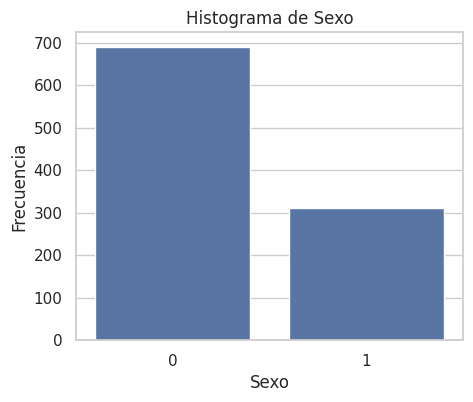

In [23]:
# Configurar el estilo de Seaborn (opcional)
sns.set(style="whitegrid")

# Crear el histograma utilizando Seaborn
plt.figure(figsize=(5, 4))
sns.countplot(data=df_banco, x='sexo')
plt.title('Histograma de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

In [24]:
def analisis_exploratorio():
  global df_banco
  histogramas = ['sexo','estado_civil','rango_plazos_credito','rango_edad','default']
  lista_histogramas = list(enumerate(histogramas))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)#quiero 3 columas y dos filas
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

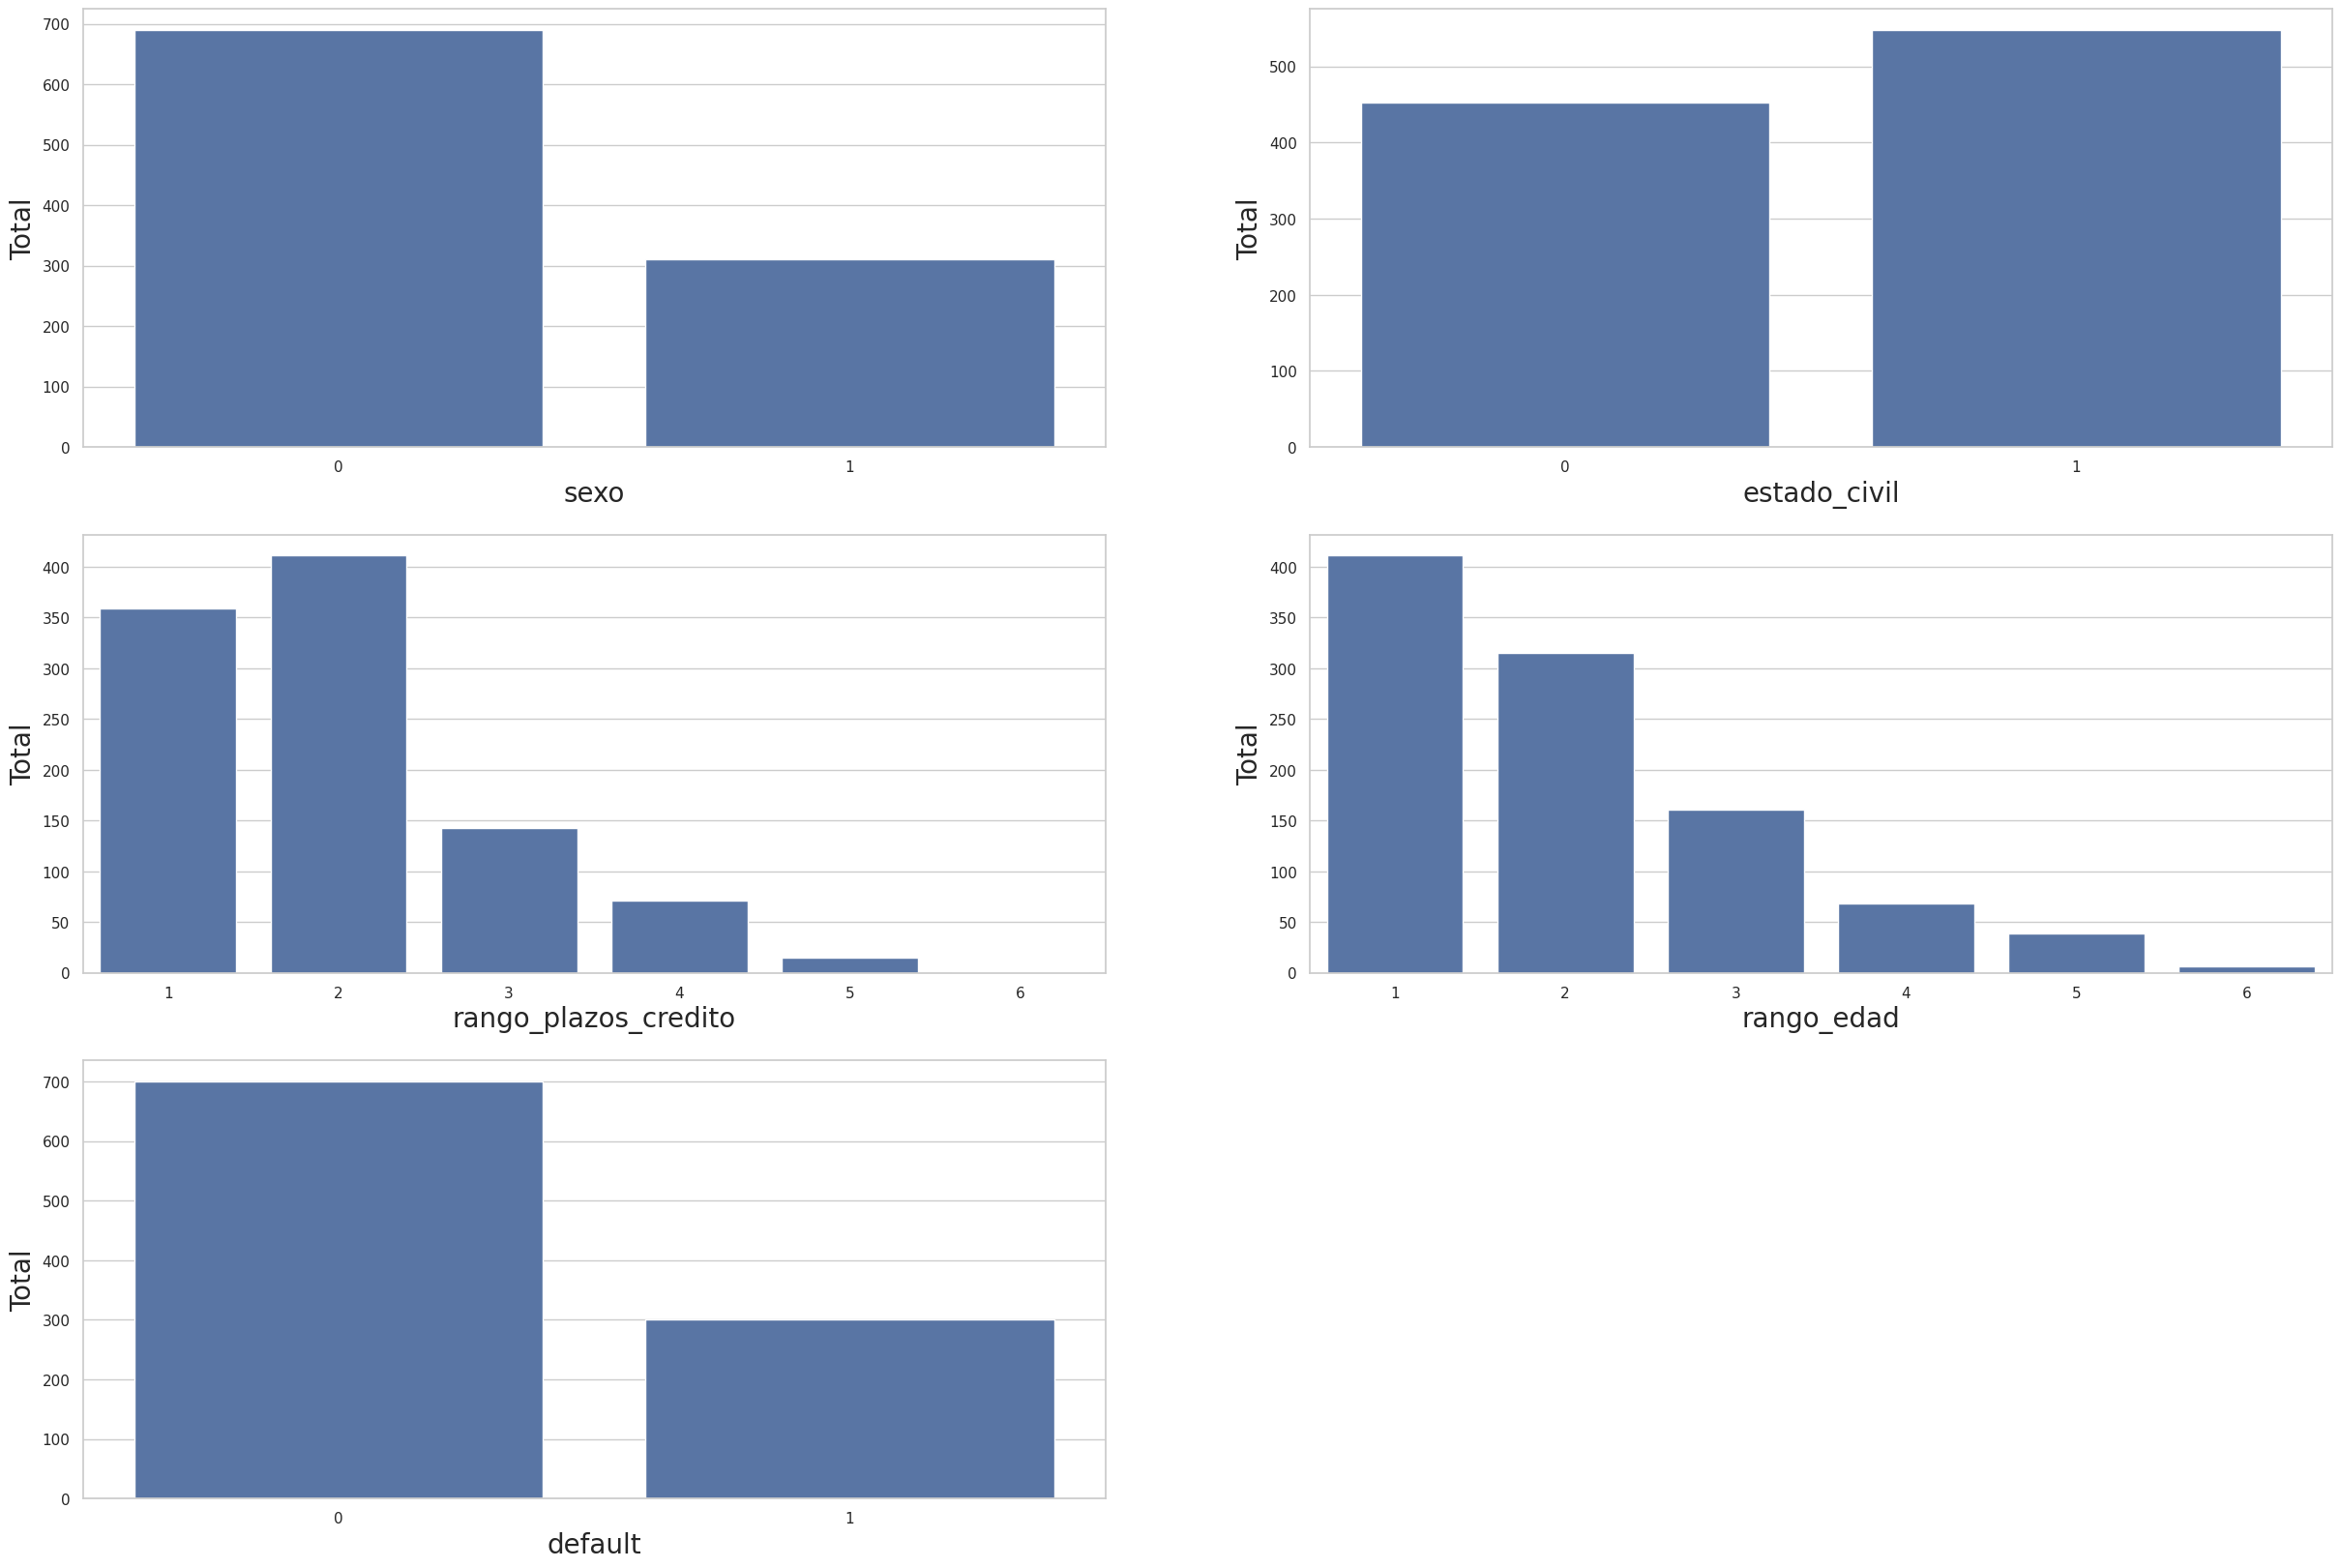

In [30]:
analisis_exploratorio()

# Desafios

1. Analizar los datos de las distribuciones e identicar si hay algun valor o registro que no se deba considerar para el modelo.

Respuesta analisis:
⬇

In [16]:
def feature_engineering_2():
  global df_banco
  dic_sexo = {2:1, 5:1, 1:0, 3:0, 4:0}
  dic_est_civil = {3:1, 5:1, 1:0, 2:0, 4:0}
  df_banco['sexo'] = df_banco['personal_status_sex'].map(dic_sexo)
  df_banco['estado_civil'] = df_banco['personal_status_sex'].map(dic_est_civil)
  df_banco['rango_edad_2'] = pd.cut(x = df_banco['age'],
                                  bins=[18, 30, 40, 50, 60, 80],
                                  labels = [1, 2, 3, 4, 5]).astype(int)
  df_banco['rango_plazos_credito_2']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 72],
                                            labels = [1, 2, 3, 4, 5]).astype(int)
  df_banco['rango_valor_credito']=pd.cut(x = df_banco['credit_amount'],
                                           bins=[1, 1000, 2000, 3000, 4000,
                                                 5000, 6000, 7000, 8000, 9000,
                                                 10000, 11000, 12000, 13000,
                                                 14000, 15000, 16000, 17000,
                                                 18000, 19000, 20000],
                                           labels = [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10, 11, 12, 13, 14, 15, 16,
                                                     17, 18, 19, 20]).astype(int)
  df_banco = df_banco.drop(columns=['personal_status_sex','age',
                                    'duration_in_month','credit_amount'])

In [17]:
feature_engineering_2()
df_banco.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad_2,rango_plazos_credito_2,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [18]:
print(df_banco.isnull().sum())

default                       0
account_check_status          0
credit_history                0
purpose                       0
savings                       0
present_emp_since             0
installment_as_income_perc    0
other_debtors                 0
present_res_since             0
property                      0
other_installment_plans       0
housing                       0
credits_this_bank             0
job                           0
people_under_maintenance      0
telephone                     0
foreign_worker                0
sexo                          0
estado_civil                  0
rango_edad_2                  0
rango_plazos_credito_2        0
rango_valor_credito           0
dtype: int64


In [19]:
def analisis_exploratorio_2():
  global df_banco
  histogramas_2 = ['sexo','estado_civil','rango_plazos_credito_2','rango_edad_2','rango_valor_credito','default']
  lista_histogramas = list(enumerate(histogramas_2))
  plt.figure(figsize = (30,20))
  plt.title('Histogramas_2')
  for i in lista_histogramas:
    plt.subplot(3, 2, i[0]+1)#quiero 3 columas y dos filas
    sns.countplot(x = i[1], data = df_banco)
    plt.xlabel(i[1], fontsize=20)
    plt.ylabel('Total', fontsize=20)

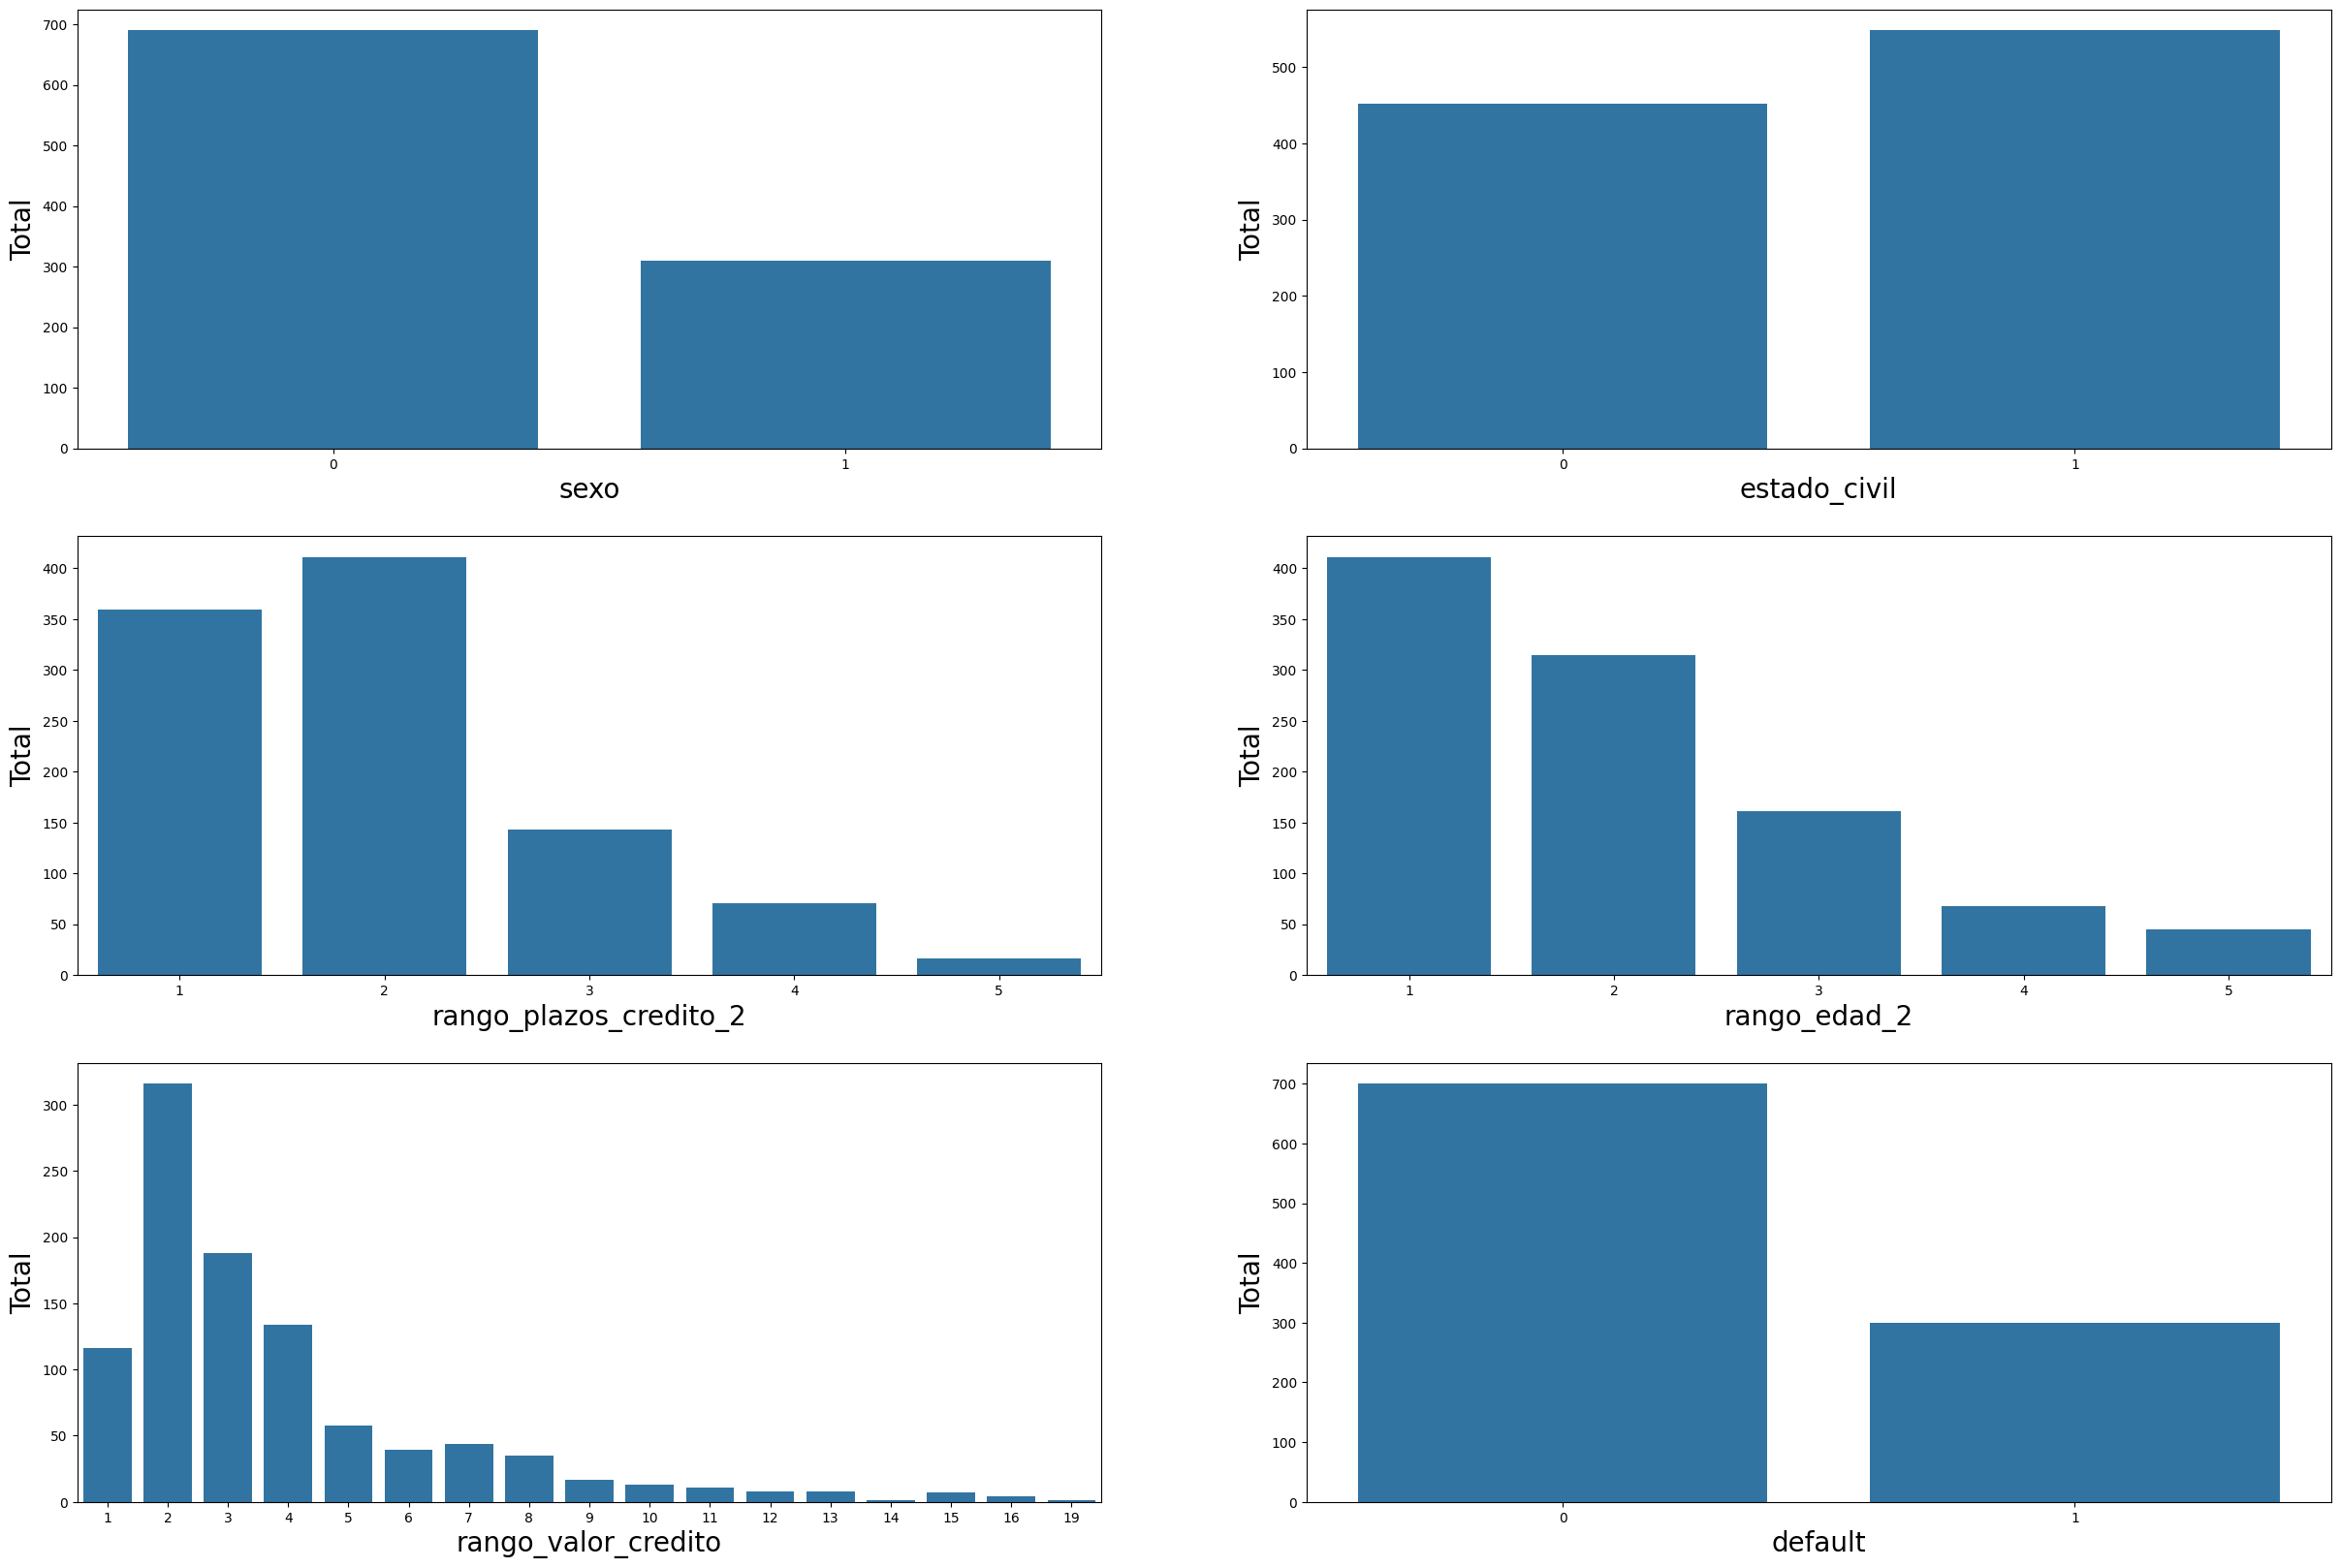

In [20]:
analisis_exploratorio_2()

Con estas graficas es muy prematuro predecir que que valores no se deben considerar para el modelo, entiendo que entre mas valores y datos tengamos en nuestro DF, es mucho mejor para nuestros futuros modelos Ml. Para este caso decidi realizar pd.cut solo en 5 rangos, donde las edades de 60 a 80  fueron unidas para que sea mas homogeneo y evitar outliers.
Para el caso de los plazos de creditos tambien se observa que los creditos mayores a 60 meses son casi cero(para el caso de este Df es solo 1 credito)


```
# Tiene formato de código


df_banco['rango_edad_2'] = pd.cut(x = df_banco['age'],bins=[18, 30, 40, 50, 60, 80],
                                  labels = [1, 2, 3, 4, 5]).astype(int)
df_banco['rango_plazos_credito_2']=pd.cut(x = df_banco['duration_in_month'],
                                            bins=[1, 12, 24, 36, 48, 72],
                                            labels = [1, 2, 3, 4, 5]).astype(int)
```
Inclui el rango valor de credito el cual seria importante analizar si los pd. cut del rango 10 al 19 serian pertinentes, pero este analisis considere que debe tener relacion con otras variables.

### 2. Definir y crear un mapa de calor_correlacion

**Respuesta analisis**: ⬇

**Correlación:**
Es una correlación es una medida estadística. La correlación de datos es una forma de entender la relación entre múltiples valores o características en su conjunto de datos.

Todos los proyectos de ciencia de datos que tienen éxito giran en torno a la búsqueda de correlaciones precisas entre las variables de entrada y las de destino. Sin embargo, a menudo nos olvidamos de la importancia del análisis de correlación.

Se recomienda realizar un análisis de correlación antes y después de las fases de recopilación y transformación de datos de un proyecto de ciencia de datos.

 Hay tres tipos diferentes de correlaciones: **texto en negrita** **texto en negrita**

Correlación Positiva: Dos variables pueden estar positivamente correlacionadas entre sí. Significa que cuando el valor de una variable aumenta, el valor de la(s) otra(s) variable(s) también aumenta (también disminuye cuando la otra disminuye).
Por ejemplo, cuanto más tiempo pases corriendo en una cinta, más calorías quemarás.
Correlación Negativa: Dos variables pueden estar negativamente correlacionadas entre sí. Esto ocurre cuando el valor de una variable aumenta y el valor de otra(s) variable(s) disminuye (inversamente proporcional).
Por ejemplo, a medida que el tiempo se vuelve más frío, los costes del aire acondicionado disminuyen.
Sin Correlación: Dos variables pueden no tener ninguna relación entre sí. Esto ocurre cuando se cambia el valor de una variable y el valor de la otra no se ve afectado.
Por ejemplo, no hay relación entre la cantidad de té que se bebe y el nivel de inteligencia.

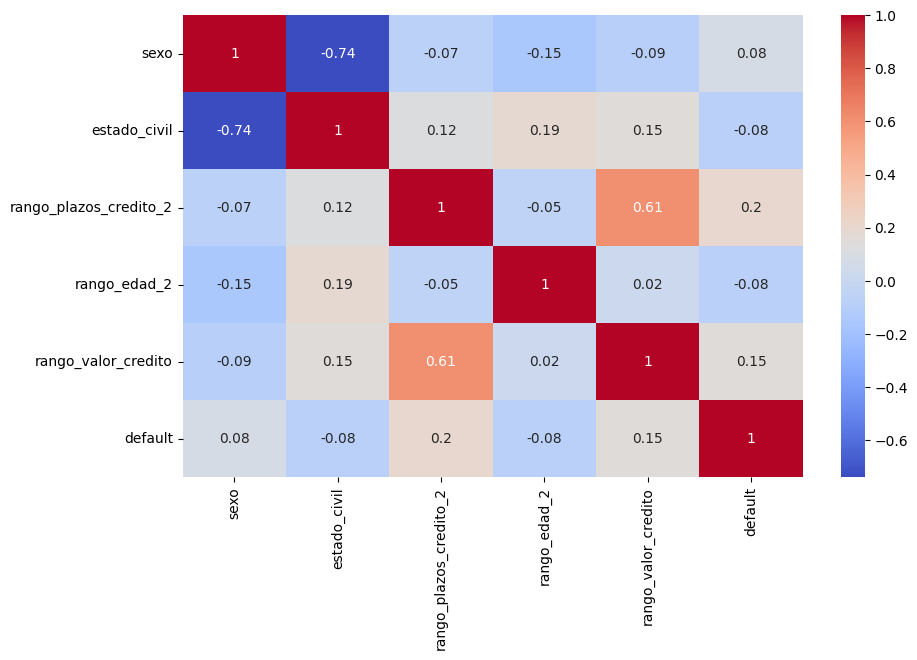

In [71]:


lista_hot_map = ['sexo','estado_civil','rango_plazos_credito_2','rango_edad_2','rango_valor_credito','default']
df_banco_2 = df_banco[lista_hot_map]
correlation_matrix = df_banco_2.corr().round(2)
plt.figure(figsize=(10, 6))
sns.heatmap(data=correlation_matrix,annot=True, cmap='coolwarm')
plt.show()


In [68]:
df_banco_2
correlation_matrix


,sexo,estado_civil,rango_plazos_credito_2,rango_edad_2,rango_valor_credito,default
sexo,1.00,-0.74,-0.07,-0.15,-0.09,0.08
estado_civil,-0.74,1.00,0.12,0.19,0.15,-0.08
rango_plazos_credito_2,-0.07,0.12,1.00,-0.05,0.61,0.20
rango_edad_2,-0.15,0.19,-0.05,1.00,0.02,-0.08
rango_valor_credito,-0.09,0.15,0.61,0.02,1.00,0.15
default,0.08,-0.08,0.20,-0.08,0.15,1.00


### 3. Crear una conclusion para cada uno de los gráficos mostrados.

Se realizó con la acomodación de los rangos para rango de plazos y de edad, propuestos en el primer punto de este desafio.

#### Respuesta analisis: ⬇


**Sexo:** Se observa que hay mas personas del sexo masculino con un 69% tomando créditos frente al femenino por un 31%.


**Estado Civil:** El Estado civil soltero es el que mas predomina con un 54,8% frente al acumulado de los otros(casado, viudo, separado (a)) del 45,2%


**Rango Plazo:** Se observa que los plazos de la cartera predominan para los 2 primeros años con un 77%, mostrando que para plazos mayores a 60 meses  son casi inexistentes.


13 a 24  meses    41.1 %
1 a 12 meses      35.9 %
25 a 36 meses     14.3%
37 a 60 meses     7.1 %
Mayor a 60 meses    1.6 %


**Rango Edad:** Se observa que los jovenes menores a 30 años son las personas que mas toman créditos,(41,1%) siguiendolos por los de 31 a 40 años (31,1%), con casi un 70% aprox. Esta variable se puede considerar que tenga relación por el periodo mas productivo de la vida de las personas.


Menores 30      41.1%
31 y 40         31.5%
41 y 50         16.1%
51 y 60         6.8%
Mayores 60      4.5%







In [31]:
# prompt: Como sacar porcentajes para df_bancos

df_banco.sexo.value_counts(normalize=True) * 100


0    69.0
1    31.0
Name: sexo, dtype: float64

In [32]:
df_banco.estado_civil.value_counts(normalize=True) * 100
#'sexo','estado_civil','rango_plazos_credito','rango_edad','default'

1    54.8
0    45.2
Name: estado_civil, dtype: float64

In [34]:
df_banco.rango_plazos_credito_2.value_counts(normalize=True) * 100

2    41.1
1    35.9
3    14.3
4     7.1
5     1.6
Name: rango_plazos_credito_2, dtype: float64

In [35]:
df_banco.rango_edad_2.value_counts(normalize=True) * 100

1    41.1
2    31.5
3    16.1
4     6.8
5     4.5
Name: rango_edad_2, dtype: float64